## Insights - Contrato procesado Cargofive

#### por Rodolfo Pardo 

#### Data Extraction

In [2]:
#Se importan las librerias que vamos a utilizar

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Se configura las dimensiones de los graficos a utilizar

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('fivethirtyeight')

In [7]:
#Se lee la base otorgada por Cargofive 

rutas = pd.read_csv('contrato_puerto.csv')

### Data cleaning

In [8]:
#Primeros valores 

rutas.head()

,PUERTO DE ORIGEN,PAIS,20DRY,40DRY,40H.C.,CURR.,CARGO
0,QINGDAO,CHINA,725,1350,1350,USD,BUC
1,KAOHSIUNG ( Solo VLC),TAIWAN,725,1350,1350,USD,BUC
2,HONG KONG (Solo VLC),HONG KONG,725,1350,1350,USD,BUC
3,PUSAN,SOUTH KOREA,725,1350,1350,USD,BUC
4,SHANGHAI,CHINA,725,1350,1350,USD,BUC


In [9]:
#Ultimos valores 

rutas.tail()

,PUERTO DE ORIGEN,PAIS,20DRY,40DRY,40H.C.,CURR.,CARGO
69,MUNDRA,India,875,1600,1600,GBP,BUC
70,TUTICORIN,India,975,1800,1800,USD,BUC
71,CALCUTTA,India,975,1800,1800,USD,BUC
72,CHENNAI,India,875,1600,1600,USD,BUC
73,KATTUPALLI,India,875,1600,1600,USD,BUC


<font color=blue>Primeras conclusiones de nuestra base

In [10]:
print("Esta conjunto de datos contiene {} rutas realizadas con {} variables para analizar".format(rutas.shape[0], rutas.shape[1]))

Esta conjunto de datos contiene 74 rutas realizadas con 7 variables para analizar


In [16]:
#Variables a analizar 

rutas.columns

Index(['PUERTO DE ORIGEN', 'PAIS', '20DRY', '40DRY', '40H.C.', 'CURR.',
       'CARGO'],
      dtype='object')

In [18]:
#Estadística descriptiva de variables numéricas
#Cantidad, promedio, desviación standart, minima, quartiles y maximo

rutas.describe()

,20DRY,40DRY,40H.C.
count,74.000000,74.000000,74.000000
mean,831.756757,1561.486486,1561.486486
std,80.696592,157.364270,157.364270
min,725.000000,1350.000000,1350.000000
25%,775.000000,1450.000000,1450.000000
50%,825.000000,1550.000000,1550.000000
75%,875.000000,1600.000000,1600.000000
max,1125.000000,2050.000000,2050.000000


In [21]:
#Tipo de columna con tipo de dato

rutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PUERTO DE ORIGEN  74 non-null     object
 1   PAIS              74 non-null     object
 2   20DRY             74 non-null     int64 
 3   40DRY             74 non-null     int64 
 4   40H.C.            74 non-null     int64 
 5   CURR.             74 non-null     object
 6   CARGO             74 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.2+ KB


In [34]:
#Se realiza el cambio de nombres de columnas para la mejor comprensión de nuestros datos

columnas = ['puerto_origen', 'pais_destino', 'contenedor20', 'contenedor40', 'contenedor40hc', 'moneda', 'cargo']
rutas.columns = columnas

In [35]:
#Investigación de valores nulos en nuestra base de datos 

rutas.isnull().sum()

puerto_origen     0
pais_destino      0
contenedor20      0
contenedor40      0
contenedor40hc    0
moneda            0
cargo             0
dtype: int64

In [37]:
#Investigación de valores repetidos en país

rutas.duplicated(subset=['pais_destino']).sum()

57

In [38]:
#Investigación de valores repetidos por puerto de origen

rutas.duplicated(subset=['puerto_origen']).sum()

2

#### Entendiendo que los valores repetidos en país son razonables por establecerse como puerto destino no se eliminan ya que resultan interesantes para el estudio a realizarse en este proyecto de datos. Lo mismo ocurre con los dos valores repetidos en puertos de origen

#### Ante la ausencia de valores nulos en nuestra base, se pueden trabajar estos datos de forma correcta

### Data exploration

In [39]:
#Cantidad de rutas por país 

rutas['pais_destino'].value_counts()

CHINA          32
India           7
Japon           7
Taiwan          4
Malasia         4
Indonesia       4
Tailandia       3
Filipinas       2
HONG KONG       2
Vietnam         2
SOUTH KOREA     1
Camboya         1
SINGAPORE       1
Myanmar         1
Bangladesh      1
TAIWAN          1
Pakistán        1
Name: pais_destino, dtype: int64

In [40]:
#Proporción en cantidad de rutas por país 

rutas['pais_destino'].value_counts(normalize = True)

CHINA          0.432432
India          0.094595
Japon          0.094595
Taiwan         0.054054
Malasia        0.054054
Indonesia      0.054054
Tailandia      0.040541
Filipinas      0.027027
HONG KONG      0.027027
Vietnam        0.027027
SOUTH KOREA    0.013514
Camboya        0.013514
SINGAPORE      0.013514
Myanmar        0.013514
Bangladesh     0.013514
TAIWAN         0.013514
Pakistán       0.013514
Name: pais_destino, dtype: float64

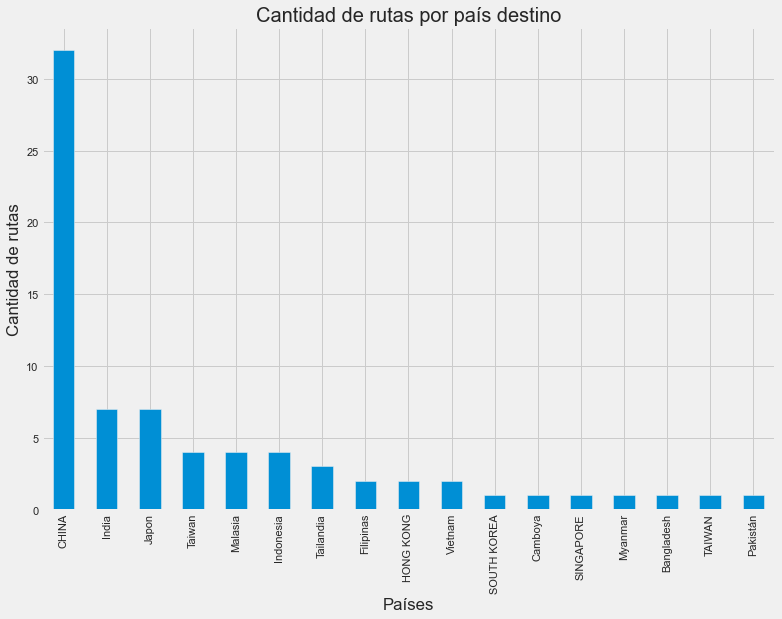

<Figure size 842.4x595.44 with 0 Axes>

In [80]:
#Visualización de cantidad de rutas por país 

rutas['pais_destino'].value_counts().plot.bar()
plt.title('Cantidad de rutas por país destino', fontsize = 20)
plt.xlabel('Países')
plt.ylabel('Cantidad de rutas')
plt.show()
plt.savefig('rutas_por_pais_destino.png')

------------

In [45]:
#Analisis tipo de contenedor 20

rutas.contenedor20.describe()

count      74.000000
mean      831.756757
std        80.696592
min       725.000000
25%       775.000000
50%       825.000000
75%       875.000000
max      1125.000000
Name: contenedor20, dtype: float64

In [46]:
#Rutas con el máximo cobro en contenedor 20

rutas[rutas['contenedor20'] == 1125]

,puerto_origen,pais_destino,contenedor20,contenedor40,contenedor40hc,moneda,cargo
24,CHONG QING,CHINA,1125,2050,2050,USD,BUC


In [47]:
#Rutas con el máximo cobro en contenedor 20

rutas[rutas['contenedor20'] == 725]

,puerto_origen,pais_destino,contenedor20,contenedor40,contenedor40hc,moneda,cargo
0,QINGDAO,CHINA,725,1350,1350,USD,BUC
1,KAOHSIUNG ( Solo VLC),TAIWAN,725,1350,1350,USD,BUC
2,HONG KONG (Solo VLC),HONG KONG,725,1350,1350,USD,BUC
3,PUSAN,SOUTH KOREA,725,1350,1350,USD,BUC
4,SHANGHAI,CHINA,725,1350,1350,USD,BUC
5,NINGBO,CHINA,725,1350,1350,USD,BUC
6,NANSHA,CHINA,725,1350,1350,USD,BUC
7,YANTIAN,CHINA,725,1350,1350,USD,BUC
8,SINGAPORE,SINGAPORE,725,1350,1350,USD,BUC


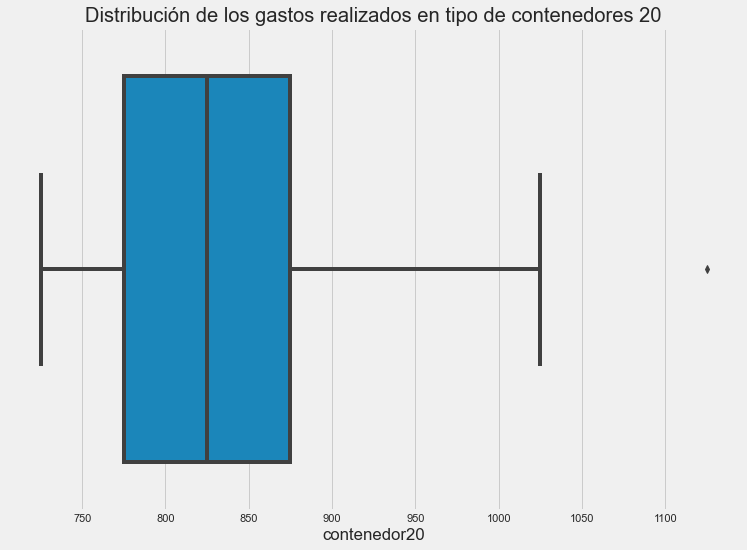

<Figure size 842.4x595.44 with 0 Axes>

In [78]:
#Grafico de caja para saber la distribución de los gastos en contenedores tipo 20 

sns.boxplot(rutas['contenedor20'])
plt.title('Distribución de los gastos realizados en tipo de contenedores 20')
plt.show()
plt.savefig('contenedores20_gastos.png')

In [60]:
#Analisis tipo de contenedor 40

rutas.contenedor40.describe()

count      74.000000
mean     1561.486486
std       157.364270
min      1350.000000
25%      1450.000000
50%      1550.000000
75%      1600.000000
max      2050.000000
Name: contenedor40, dtype: float64

In [59]:
#Ruta más costosa 

rutas[rutas['contenedor40'] == 2050]

,puerto_origen,pais_destino,contenedor20,contenedor40,contenedor40hc,moneda,cargo
24,CHONG QING,CHINA,1125,2050,2050,USD,BUC


In [58]:
#Rutas menos costosas

rutas[rutas['contenedor40'] == 1350]

,puerto_origen,pais_destino,contenedor20,contenedor40,contenedor40hc,moneda,cargo
0,QINGDAO,CHINA,725,1350,1350,USD,BUC
1,KAOHSIUNG ( Solo VLC),TAIWAN,725,1350,1350,USD,BUC
2,HONG KONG (Solo VLC),HONG KONG,725,1350,1350,USD,BUC
3,PUSAN,SOUTH KOREA,725,1350,1350,USD,BUC
4,SHANGHAI,CHINA,725,1350,1350,USD,BUC
5,NINGBO,CHINA,725,1350,1350,USD,BUC
6,NANSHA,CHINA,725,1350,1350,USD,BUC
7,YANTIAN,CHINA,725,1350,1350,USD,BUC
8,SINGAPORE,SINGAPORE,725,1350,1350,USD,BUC


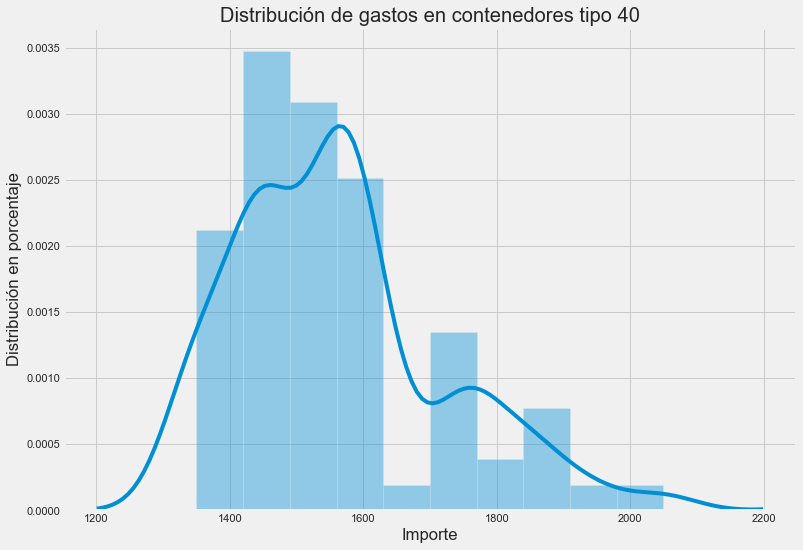

<Figure size 842.4x595.44 with 0 Axes>

In [79]:
#Distrubución contenedores 40 

sns.distplot(rutas['contenedor40'])
plt.title('Distribución de gastos en contenedores tipo 40')
plt.xlabel('Importe')
plt.ylabel('Distribución en porcentaje')
plt.show()
plt.savefig('distribucion_gastos_contenedores_40.png')

In [64]:
#Estudio de monedas 

rutas.moneda.value_counts()

USD    66
EUR     7
GBP     1
Name: moneda, dtype: int64

In [66]:
#Proporción de monedas

rutas.moneda.value_counts(normalize = True)

USD    0.891892
EUR    0.094595
GBP    0.013514
Name: moneda, dtype: float64

In [71]:
#Estudio de cargos

rutas.cargo.value_counts(normalize = True)

BUC       0.905405
ISOCC     0.081081
WRC       0.013514
Name: cargo, dtype: float64

In [72]:
rutas.columns

Index(['puerto_origen', 'pais_destino', 'contenedor20', 'contenedor40',
       'contenedor40hc', 'moneda', 'cargo'],
      dtype='object')

#### Agrupación país destino

In [75]:
rutas.groupby('pais_destino')[['contenedor20', 'contenedor40', 'contenedor40hc']].agg(['mean', 'sum', 'min', 'max'])

contenedor20                    contenedor40                     \
                     mean    sum   min   max         mean    sum   min   max   
pais_destino                                                                   
Bangladesh    1025.000000   1025  1025  1025  1950.000000   1950  1950  1950   
CHINA          835.937500  26750   725  1125  1575.000000  50400  1350  2050   
Camboya        875.000000    875   875   875  1650.000000   1650  1650  1650   
Filipinas      800.000000   1600   775   825  1500.000000   3000  1450  1550   
HONG KONG      737.500000   1475   725   750  1375.000000   2750  1350  1400   
India          903.571429   6325   875   975  1657.142857  11600  1600  1800   
Indonesia      775.000000   3100   775   775  1450.000000   5800  1450  1450   
Japon          853.571429   5975   825   925  1635.714286  11450  1550  1750   
Malasia        775.000000   3100   775   775  1450.000000   5800  1450  1450   
Myanmar        925.000000    925   925   925  1750.000000   1750  1750  1750   
Pakistán       875.000000    875   875   875  1600.000000   1600  1600  1600   
SINGAPORE      725.000000    725   725   725  1350.000000   1350  1350  1350   
SOUTH KOREA    725.000000    725   725   725  1350.000000   1350  1350  1350   
TAIWAN         725.000000    725   725   725  1350.000000   1350  1350  1350   
Tailandia      841.666667   2525   775   975  1583.333333   4750  1450  1850   
Taiwan         818.750000   3275   750   875  1525.000000   6100  1400  1600   
Vietnam        775.000000   1550   775   775  1450.000000   2900  1450  1450   

             contenedor40hc                     
                       mean    sum   min   max  
pais_destino                                    
Bangladesh      1950.000000   1950  1950  1950  
CHINA           1575.000000  50400  1350  2050  
Camboya         1650.000000   1650  1650  1650  
Filipinas       1500.000000   3000  1450  1550  
HONG KONG       1375.000000   2750  1350  1400  
India           1657.142857  11600  1600  1800  
Indonesia       1450.000000   5800  1450  1450  
Japon           1635.714286  11450  1550  1750  
Malasia         1450.000000   5800  1450  1450  
Myanmar         1750.000000   1750  1750  1750  
Pakistán        1600.000000   1600  1600  1600  
SINGAPORE       1350.000000   1350  1350  1350  
SOUTH KOREA     1350.000000   1350  1350  1350  
TAIWAN          1350.000000   1350  1350  1350  
Tailandia       1583.333333   4750  1450  1850  
Taiwan          1525.000000   6100  1400  1600  
Vietnam         1450.000000   2900  1450  1450

In [76]:
#Se guarda la tabla 

gastos_por_pais = rutas.groupby('pais_destino')[['contenedor20', 'contenedor40', 'contenedor40hc']].agg(['mean', 'sum', 'min', 'max'])

In [77]:


gastos_por_pais.to_csv('gastos_por_pais.csv')